In [321]:
# here we are going to study lasso regression
# also known  as L1 regression .....

# extreme important points

#  Polynomial Regression → degree ↑ → overfit.
#  Ridge/Lasso → λ ↑ → underfit.

In [322]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[28.71661332]
-2.901726712444909


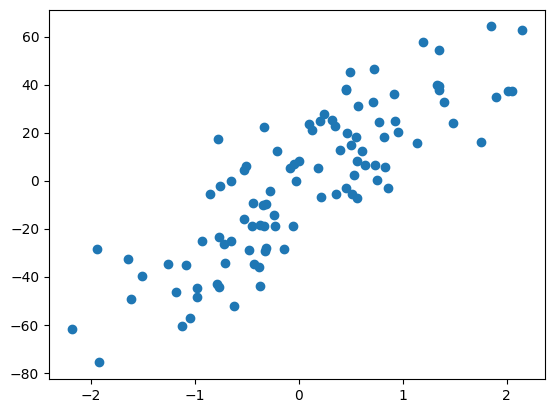

In [323]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+04, tolerance: 8.096e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

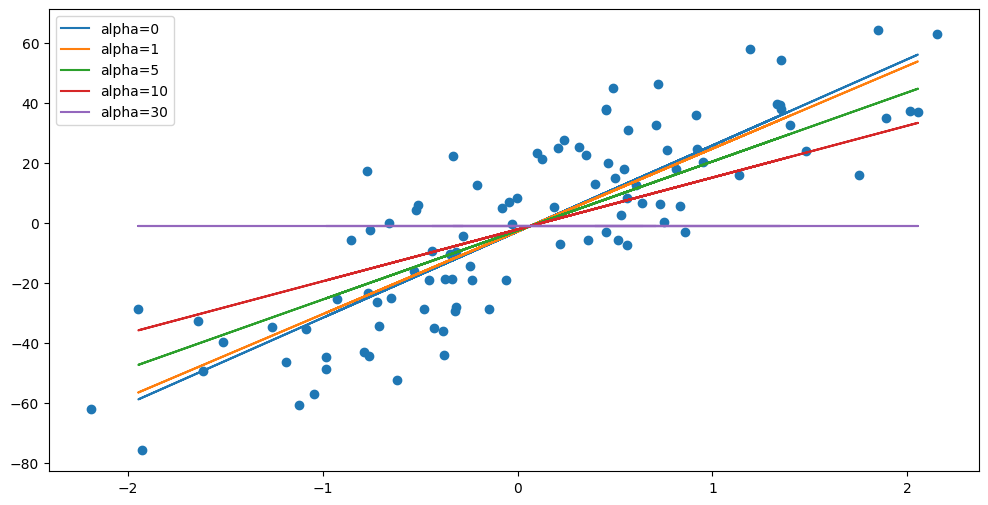

In [324]:

alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()
    # when alpha is 0 ... it following the the linear regression
    # plotting ...

    # when alpha is 30 our slope or cofficient is 0
    # and that is the major difference between ridge and lasso
    # in ridge our cofficient never be 0 but in lasso
    # our cofficient could be 0 too ...

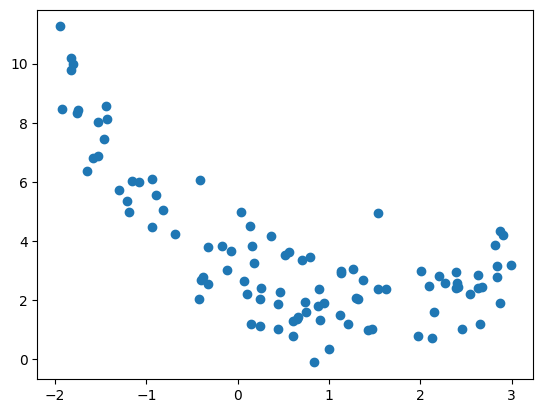

In [325]:

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

# here we are generating non linear  regression data
#  then we see the difference



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.913e+01, tolerance: 5.898e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

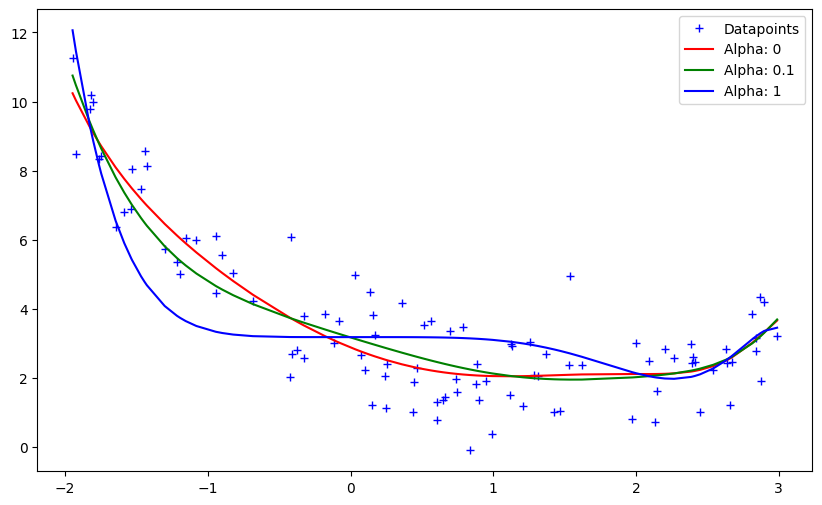

In [326]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# here we have implanted ridge regression  over  nonlinear data set
# for alpha is 0 showing normal linear regression
# for 0.1 ..its better
# and for 1 its is underfitting
# best is 0.1 neither underfitting nor overfitting '


In [327]:
# we know that in high dimensional data the overfitting scenario is
# very high.......... if its is the case of polynomial regression
# and we keep incresing the degree then the overfitting case is
# extremely high...

# whereas ,
#             ridge regression

#         if we implants the ridge regression over it the
#         cofficient will never be 0 ...
#         means u have a  value of cofficient whether its close
#         to ... so u have to keep the column or that feature ....

#         lasso regression

#     could convert the cofficient to 0
#     and indicates that these coloumns  have no weightages
#     anymore ....so we are doing feature selection
#     and we  are reducing the dimensions ...of the data...

# conclusion :
#             if we are working at the high dimensional ....
#             we prefer to use  lasso because it filters
#             the columns ....


In [328]:
# my doubt

# So why, if a coefficient is 0,
# it becomes non-relevant, but when a coefficient is even high negative
# it becomes important?

In [329]:
# When the coefficient is 0:

# In the regression equation:

#                   y = w(not) + w1x1 + w2x2 + ... + wnxn
# This means that changing xj will
# have no effect on the prediction.
# Therefore, the feature becomes irrelevant to the model.

# The magni                                                        tude mod wj  shows how strongly
# the feature influences the output.

# A positive coefficient means: as the feature increases,
#   the output increases.

# A negative coefficient means: as the feature increases,
#       the output decreases.

# In both cases, the feature still has a strong effect on the output,
# so it’s important — the sign only changes
#  the direction of the relationship.

In [330]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# we have generated a polynomial dataset .....
# and now we are experimenting several
# lamra values to see the results  by using
# ridge regression

In [331]:

data = load_diabetes()

In [332]:
v = pd.DataFrame(data.data,columns=data.feature_names)
v['TARGET'] = data.target

In [333]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)
v.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [334]:

coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

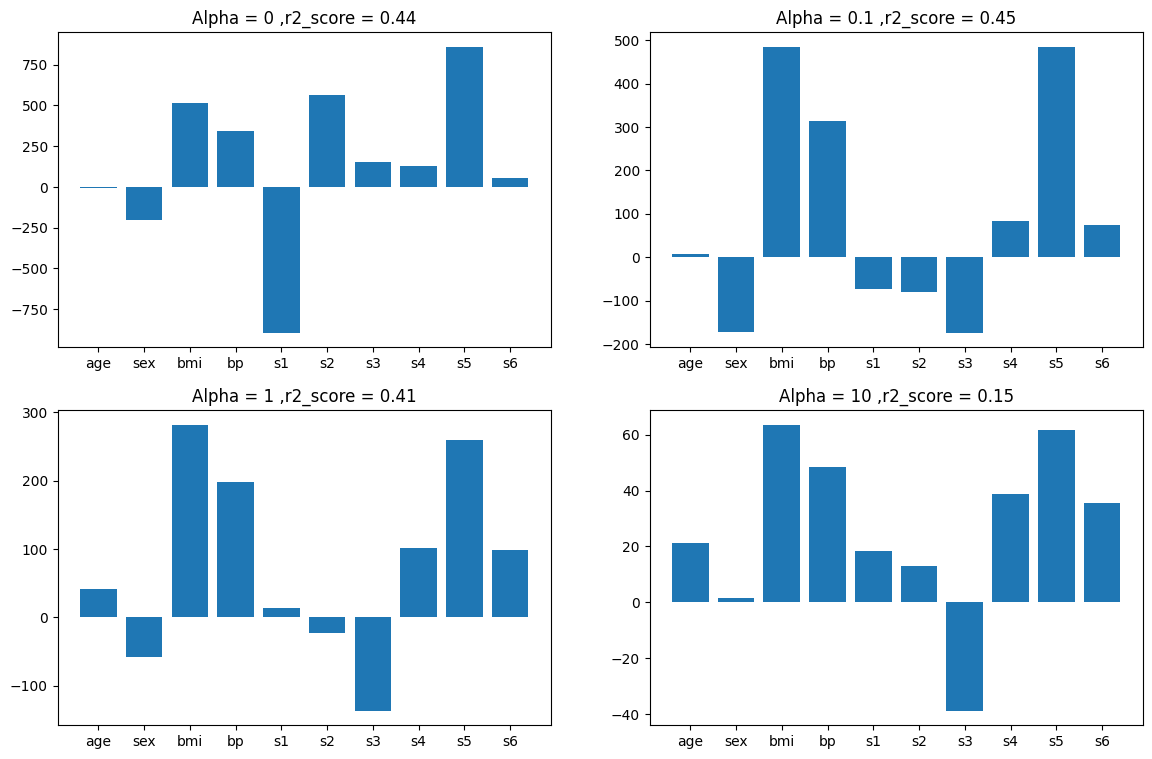

In [335]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

# at alpha is at  0

#  we could see that at s1 bmi and s5 columns are quite bigger
#  means cofficient is quite greater hence they carries extreme
#  weightage for my model ...when m

# when alpa  is at 0.1

#  bmi bp and s5 are palying key role in making my
# outpus
          #  but we also good by takin 0.1 sex also now palying
          #  important role
          #  also s1 becomes non relevent after applying 0.1 lamra

    # we could now also get deep insight by analysing the
    # lamra 1 and 30 ....

  # as we took lamra 10 our all coffients  turned to 0 .... hence we could
  # see it is the case of undefitting  even our r2 score is in negative


# conclusion
#            by seeing r2 score  in figure a and b
#            we could see thar age s1 s2 sex does not  have much weightage




In [336]:
#  higher coefficients  effects more

In [337]:
alphas = [0 , 0.0001,0.001,0.01,0.01,10,100,1000,10000]
coefs = []

for i in alphas:
  reg = Lasso(alpha=i)
  reg.fit(X_train,y_train)
  coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [338]:
input_array = np.array(coefs)

coef_v = pd.DataFrame(input_array,columns=data.feature_names)
coef_v['alpha'] = alphas
coef_v.set_index('alpha')

# by increasing  much alpha few coloumns getting 0
# bigger coefficient impacted more
# future selection is good for intermediate  coefficients

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
10000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [339]:
alphas = [0 , 0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs = []

for i in alphas:
  reg = Lasso(alpha=i)
  reg.fit(X_train,y_train)
  coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

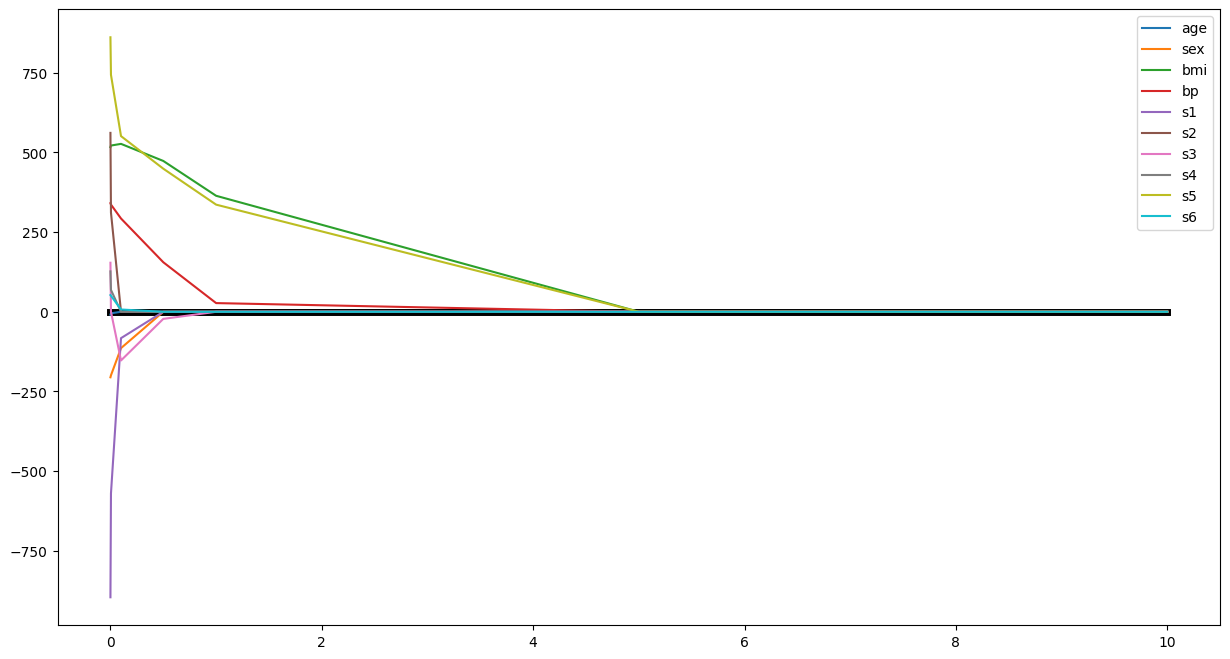

In [340]:
input_array = np.array(coefs).T


plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

In [341]:
# 3 impact on bias and the variance
 #  by increasing the lamra values

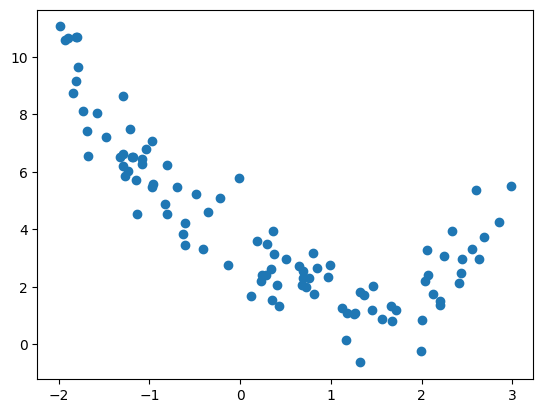

In [342]:
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.7 * x ** 2 - 2 * x + 3 + np.random.randn(m, 1)

plt.scatter(x, y)
plt.show()


In [343]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [344]:
poly = PolynomialFeatures(degree=10)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [345]:
import numpy as np
from sklearn.linear_model import Ridge
from mlxtend.evaluate import bias_variance_decomp

# Ensure arrays and correct shape
X_train_np = np.array(X_train)
y_train_np = np.array(y_train).ravel()  # 1D bana do
X_test_np = np.array(X_test)
y_test_np = np.array(y_test).ravel()

alphas = np.linspace(0, 30, 100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train_np, y_train_np, X_test_np, y_test_np,
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)


In [346]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(80, 1) (80, 1)
(20, 1) (20, 1)


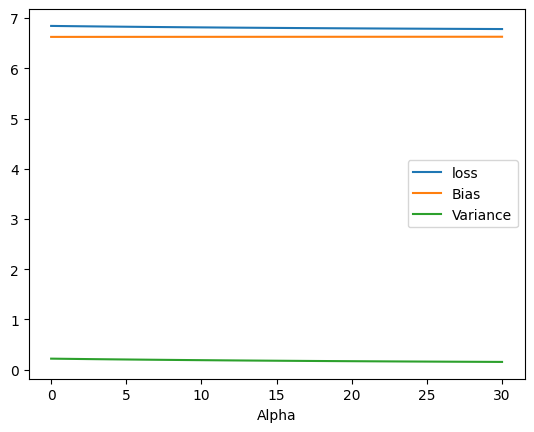

In [347]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.legend()
plt.xlabel('Alpha')
plt.legend()
 # we could  not plot the figure as sir has plotted
 # may therre is something error at my code

In [348]:
# effect of regularization on loss function

[27.82809103]
-2.29474455867698


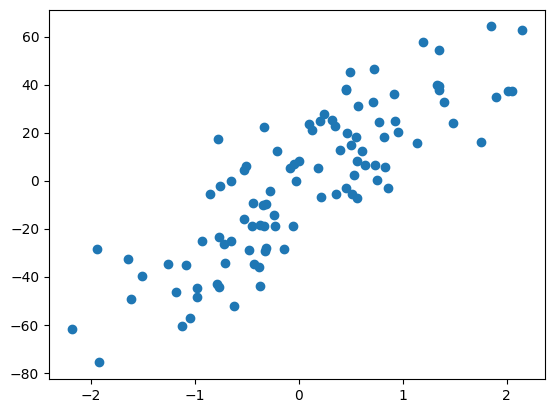

In [349]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1,
                      n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [350]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [351]:
def predict(m):
    return m*X - 2.29

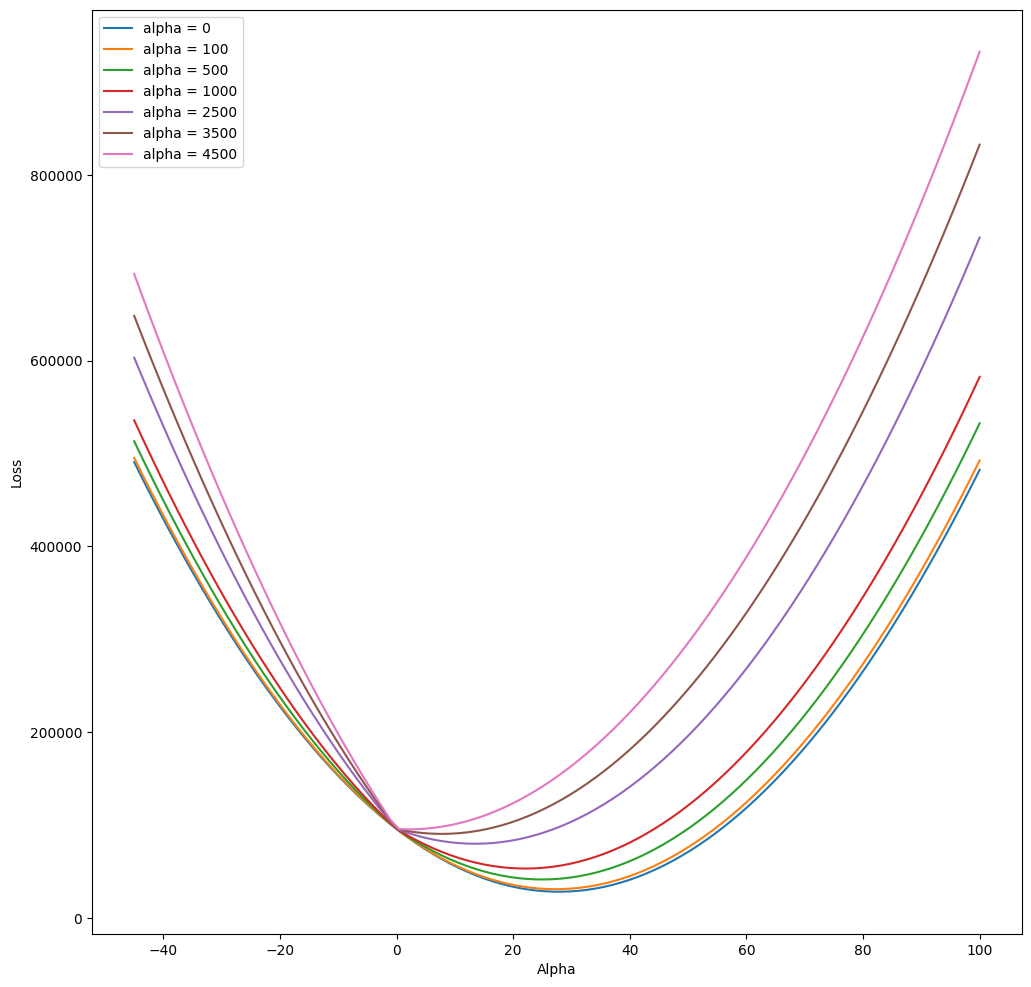

In [352]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500 , 3500 ,4500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

# we could see no matter how hard we increased the lamra it
# turned to 0 ....

#